In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [5]:
data = load_iris()
x  = data.data
y = data.target

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

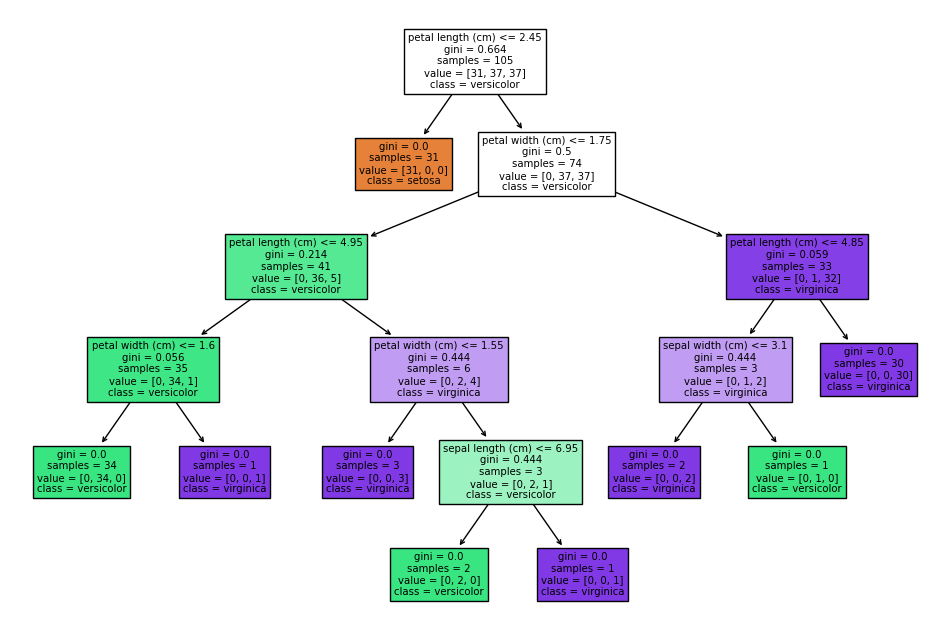

Model accuracy: 1.00


In [16]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names= data.feature_names, class_names= data.target_names,filled = True)
plt.show()
score = clf.score(x_test,y_test)
print(f"Model accuracy: {score:.2f}")


In [17]:

import numpy as np

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward propagation
def feedforward(X, weights1, bias1, weights2, bias2):
    hidden_input = np.dot(X, weights1) + bias1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights2) + bias2
    final_output = sigmoid(final_input)
    return hidden_output, final_output

# Backpropagation
def backpropagation(X, y, weights1, bias1, weights2, bias2, hidden_output, final_output, learning_rate):
    # Calculate the error
    error = y - final_output
    d_final_output = error * sigmoid_derivative(final_output)

    # Backpropagate the error
    error_hidden_layer = d_final_output.dot(weights2.T)
    d_hidden_output = error_hidden_layer * sigmoid_derivative(hidden_output)

    # Update the weights and biases
    weights2 += hidden_output.T.dot(d_final_output) * learning_rate
    bias2 += np.sum(d_final_output, axis=0, keepdims=True) * learning_rate
    weights1 += X.T.dot(d_hidden_output) * learning_rate
    bias1 += np.sum(d_hidden_output, axis=0, keepdims=True) * learning_rate

    return weights1, bias1, weights2, bias2

# Training the network
def train(X, y, weights1, bias1, weights2, bias2, learning_rate, epochs):
    for epoch in range(epochs):
        hidden_output, final_output = feedforward(X, weights1, bias1, weights2, bias2)
        weights1, bias1, weights2, bias2 = backpropagation(X, y, weights1, bias1, weights2, bias2, hidden_output, final_output, learning_rate)
        if epoch % 1000 == 0:
            loss = np.mean((y - final_output) ** 2)
            print(f'Epoch {epoch}, Loss: {loss}')
    return weights1, bias1, weights2, bias2

# Example usage
if __name__ == "__main__":
    # Input data (XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Initialize weights and biases
    np.random.seed(42)
    input_layer_neurons = 2
    hidden_layer_neurons = 2
    output_layer_neurons = 1

    weights1 = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
    bias1 = np.random.uniform(size=(1, hidden_layer_neurons))
    weights2 = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
    bias2 = np.random.uniform(size=(1, output_layer_neurons))

    # Training parameters
    learning_rate = 0.2
    epochs = 100000

    # Train the network
    weights1, bias1, weights2, bias2 = train(X, y, weights1, bias1, weights2, bias2, learning_rate, epochs)

    # Test the network
    _, final_output = feedforward(X, weights1, bias1, weights2, bias2)
    print("Predicted Output:")
    print(final_output)
    print("Actual Output:")
    print(y)

Epoch 0, Loss: 0.3246585814644244
Epoch 1000, Loss: 0.19610214801867648
Epoch 2000, Loss: 0.030506238866855877
Epoch 3000, Loss: 0.007370695897268721
Epoch 4000, Loss: 0.00384726064181123
Epoch 5000, Loss: 0.0025457917159948515
Epoch 6000, Loss: 0.001884338558030248
Epoch 7000, Loss: 0.0014881898330620813
Epoch 8000, Loss: 0.0012259217453827076
Epoch 9000, Loss: 0.0010401476400889505
Epoch 10000, Loss: 0.0009019959752346664
Epoch 11000, Loss: 0.0007954188974947838
Epoch 12000, Loss: 0.0007108098367491777
Epoch 13000, Loss: 0.000642078303625318
Epoch 14000, Loss: 0.0005851820122502716
Epoch 15000, Loss: 0.0005373358119800949
Epoch 16000, Loss: 0.0004965600232780098
Epoch 17000, Loss: 0.00046140994811386024
Epoch 18000, Loss: 0.0004308072428895205
Epoch 19000, Loss: 0.0004039311285465363
Epoch 20000, Loss: 0.0003801460959308
Epoch 21000, Loss: 0.00035895260623841196
Epoch 22000, Loss: 0.0003399526989366921
Epoch 23000, Loss: 0.0003228255101665518
Epoch 24000, Loss: 0.00030730952867177695